In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC

# Inicjalizacja klasyfikatora
clf = SVC(kernel='linear')

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # or any other classifier

def evaluate_feature_set(X, y, features):
    """
    Evaluate a feature set using cross-validation
    
    Parameters:
    X : DataFrame or array
        The full feature matrix
    y : array
        Target values
    features : list
        List of selected feature indices or names
    
    Returns:
    float : Average cross-validation score
    """
    # Select only the specified features
    X_selected = X[:, features] if isinstance(X, np.ndarray) else X[features]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)
    
    # Initialize classifier
    classifier = SVC(kernel='linear')
    
    # Perform cross-validation
    scores = cross_val_score(
        classifier,
        X_scaled,
        y,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy'  # or 'f1', 'precision', 'recall', etc.
    )
    
    return np.mean(scores)

In [3]:
def sequential_forward_selection(features, target, max_features):
    selected_features = []
    remaining_features = list(features)
    
    while len(selected_features) < max_features:
        best_score = 0
        best_feature = None
        
        # Testowanie każdej pozostałej cechy
        for feature in remaining_features:
            current_features = selected_features + [feature]
            # Obliczenie jakości klasyfikacji dla obecnego zestawu cech
            score = evaluate_feature_set(current_features, target)
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            
    return selected_features

In [4]:
def sequential_backward_selection(features, target, min_features):
    selected_features = list(features)
    
    while len(selected_features) > min_features:
        worst_score = float('inf')
        worst_feature = None
        
        # Testowanie usunięcia każdej cechy
        for feature in selected_features:
            current_features = [f for f in selected_features if f != feature]
            # Obliczenie jakości klasyfikacji bez danej cechy
            score = evaluate_feature_set(current_features, target)
            
            if score < worst_score:
                worst_score = score
                worst_feature = feature
                
        if worst_feature:
            selected_features.remove(worst_feature)
            
    return selected_features

In [6]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generowanie przykładowych danych
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicjalizacja klasyfikatora
clf = SVC(kernel='linear', random_state=42)

# Selekcja cech
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=5,
    direction='forward',
    scoring='accuracy',
    cv=5
)

# Dopasowanie i transformacja
X_selected = sfs.fit_transform(X_scaled, y)

# Wyświetlenie wyników
selected_features = sfs.get_support()
selected_feature_indices = np.where(selected_features)[0]

print("Liczba wybranych cech:", X_selected.shape[1])
print("Indeksy wybranych cech:", selected_feature_indices)

# Ocena wyników na wybranych cechach
scores = cross_val_score(clf, X_selected, y, cv=5)
print("Średnia dokładność:", scores.mean())
print("Odchylenie standardowe:", scores.std())

Liczba wybranych cech: 5
Indeksy wybranych cech: [ 0  6 10 14 15]
Średnia dokładność: 0.8099999999999999
Odchylenie standardowe: 0.09695359714832658


In [7]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generowanie przykładowych danych
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicjalizacja klasyfikatora
clf = SVC(kernel='linear', random_state=42)

# Selekcja cech
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=5,
    direction='forward',
    scoring='accuracy',
    cv=5
)

# Dopasowanie i transformacja
X_selected = sfs.fit_transform(X_scaled, y)

# Wyświetlenie wyników
selected_features = sfs.get_support()
selected_feature_indices = np.where(selected_features)[0]

print("Liczba wybranych cech:", X_selected.shape[1])
print("Indeksy wybranych cech:", selected_feature_indices)

# Ocena wyników na wybranych cechach
scores = cross_val_score(clf, X_selected, y, cv=5)
print("Średnia dokładność:", scores.mean())
print("Odchylenie standardowe:", scores.std())

Liczba wybranych cech: 5
Indeksy wybranych cech: [ 0  6 10 14 15]
Średnia dokładność: 0.8099999999999999
Odchylenie standardowe: 0.09695359714832658


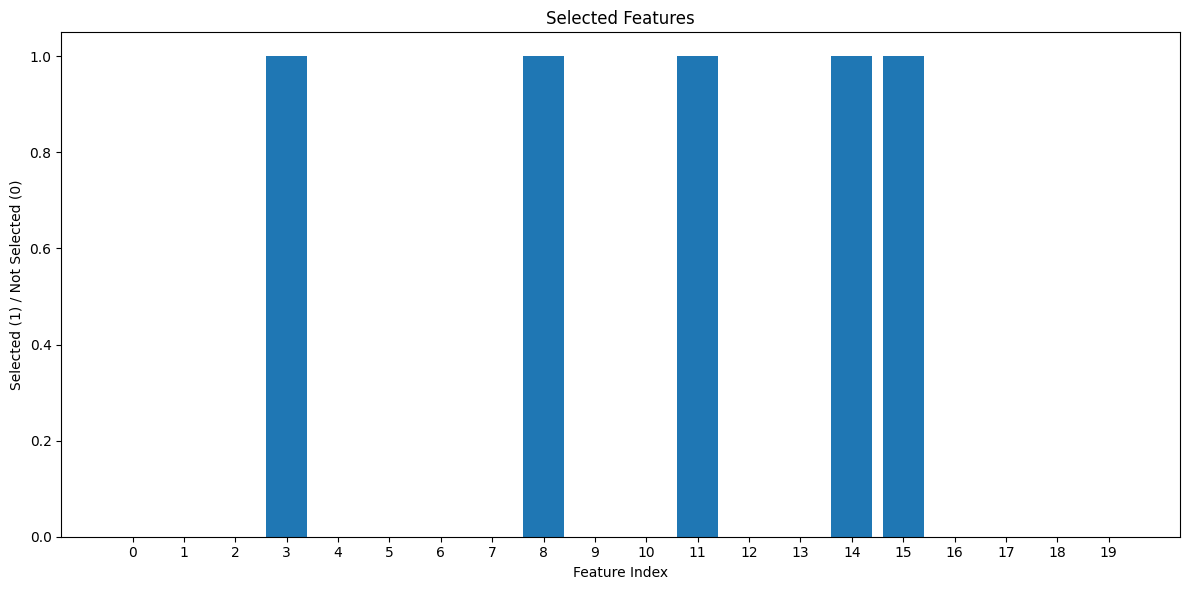

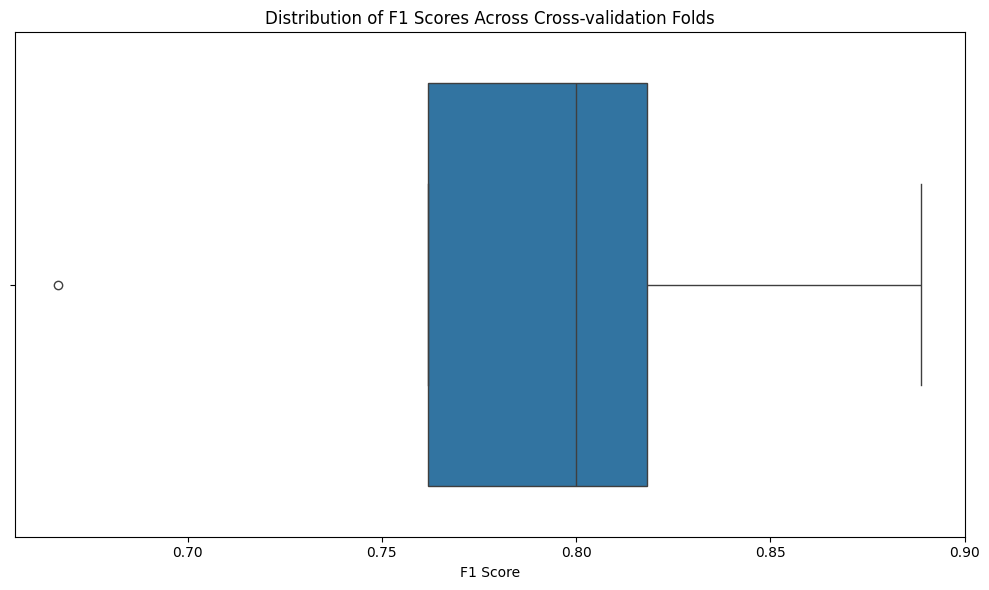

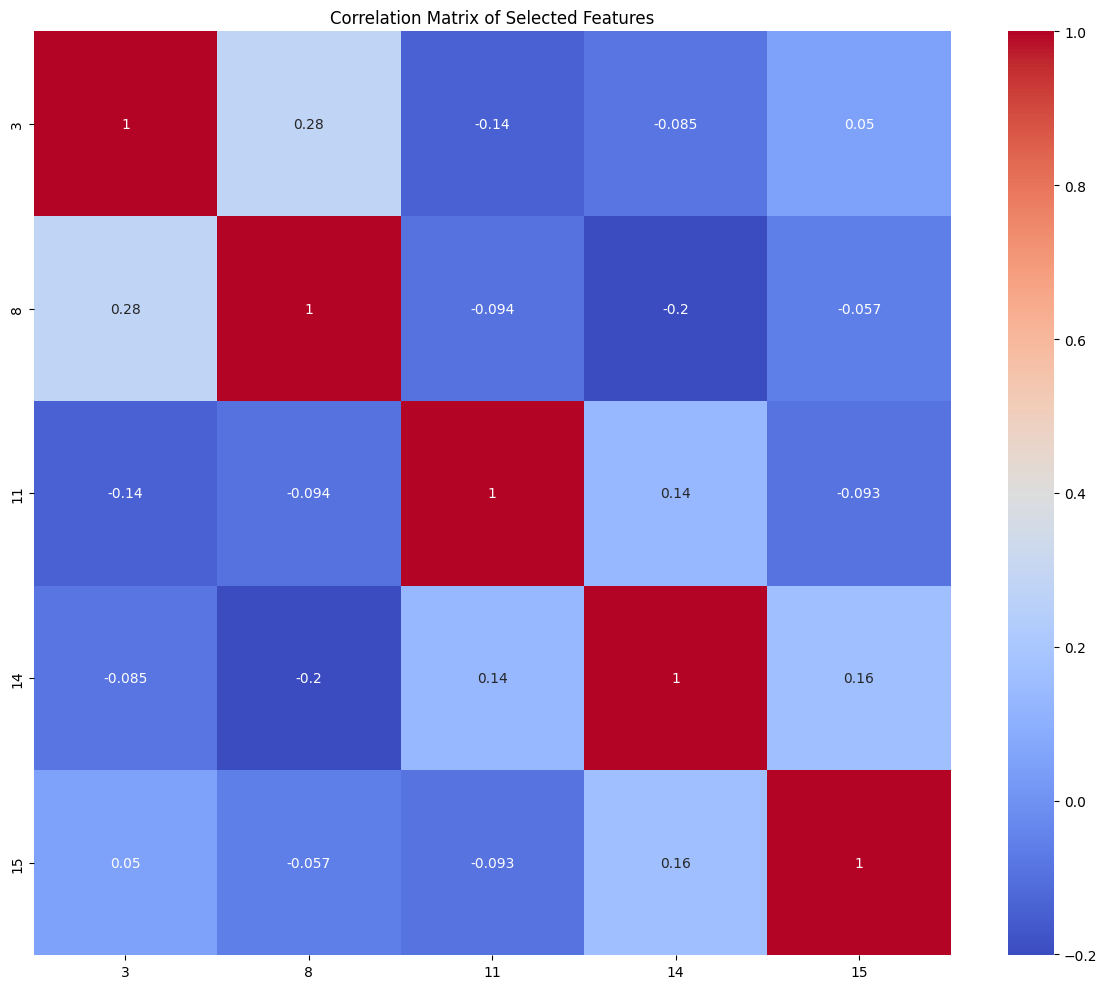

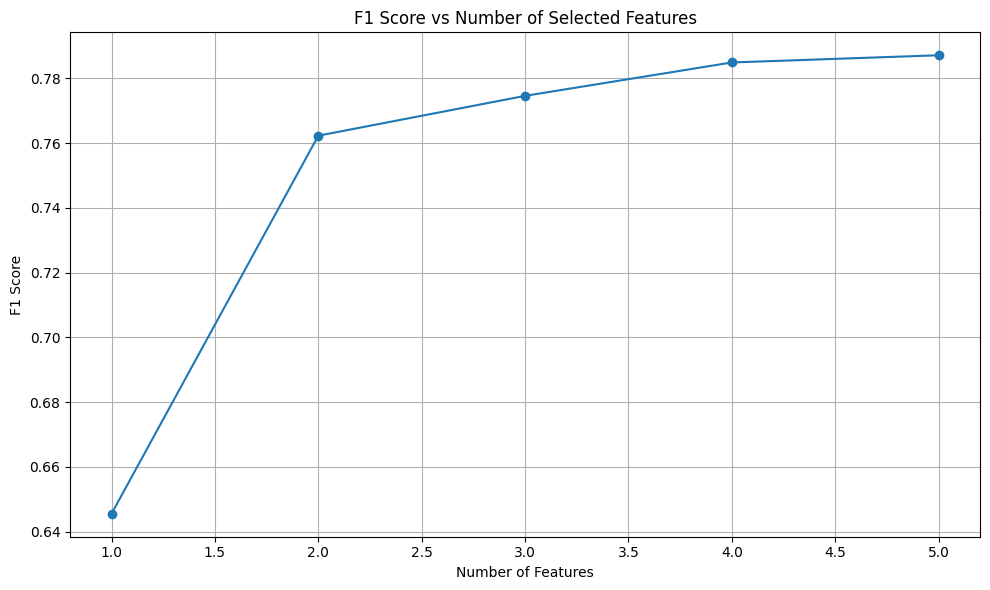

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Generate example data
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize classifier
clf = SVC(kernel='linear', random_state=42)

# Feature selection with F1 score
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=5,
    direction='forward',
    scoring='f1',
    cv=5
)

# Fit and transform
X_selected = sfs.fit_transform(X_scaled, y)

# Get selected features
selected_features = sfs.get_support()
selected_feature_indices = np.where(selected_features)[0]

# 1. Feature Importance Plot
plt.figure(figsize=(12, 6))
feature_importance = np.zeros(X.shape[1])
feature_importance[selected_feature_indices] = 1
plt.bar(range(X.shape[1]), feature_importance)
plt.title('Selected Features')
plt.xlabel('Feature Index')
plt.ylabel('Selected (1) / Not Selected (0)')
plt.xticks(range(X.shape[1]))
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 2. Cross-validation Scores Distribution
scores = cross_val_score(clf, X_selected, y, cv=5, scoring='f1')
plt.figure(figsize=(10, 6))
sns.boxplot(x=scores)
plt.title('Distribution of F1 Scores Across Cross-validation Folds')
plt.xlabel('F1 Score')
plt.tight_layout()
plt.savefig('cv_scores_distribution.png')
plt.show()

# 3. Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
selected_features_data = X_scaled[:, selected_feature_indices]
correlation_matrix = np.corrcoef(selected_features_data.T)
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=selected_feature_indices,
            yticklabels=selected_feature_indices)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

# 4. Feature Selection Progress
n_features_range = range(1, len(selected_feature_indices) + 1)
scores_progress = []
for n in n_features_range:
    sfs_n = SequentialFeatureSelector(
        clf,
        n_features_to_select=n,
        direction='forward',
        scoring='f1',
        cv=5
    )
    X_selected_n = sfs_n.fit_transform(X_scaled, y)
    scores_n = cross_val_score(clf, X_selected_n, y, cv=5, scoring='f1')
    scores_progress.append(scores_n.mean())

plt.figure(figsize=(10, 6))
plt.plot(n_features_range, scores_progress, marker='o')
plt.title('F1 Score vs Number of Selected Features')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_selection_progress.png')
plt.show()